In [33]:
models = {
    "CNN_baseline": "20240417-205521",
    "Liquid_baseline": "20240417-205749",
    "Linear_baseline": "20240417-210604",
    "CNN_with_1_liquid": "20240417-211256",
    "CNN_baseline_exp0": "20240417-212502",
    "Liquid_baseline_exp0": "20240417-213030",
}

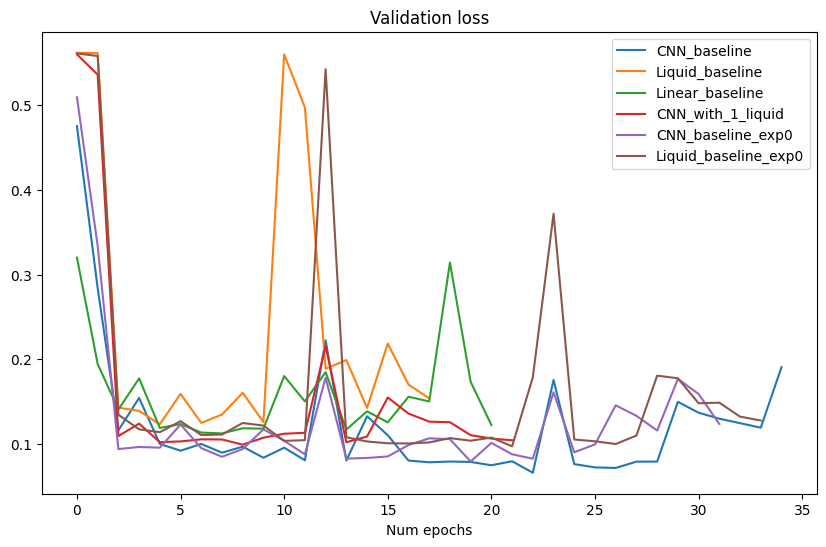

In [34]:
import numpy as np
import os
import json
import pathlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

labels = []
for model_name, address in models.items():
    cur_loss = []
    labels.append(model_name)

    cur_dir = pathlib.Path("./saved_models/") / address
    files = sorted(os.listdir(cur_dir))
    for file_name in files:
        if ".json" not in file_name:
            continue

        with open(cur_dir / file_name) as f:
            cur_metrics = json.load(f)
        
        cur_loss.append(cur_metrics["val_loss"])

    x = np.arange(len(cur_loss))
    y = np.array(cur_loss)
    plt.plot(x, y)

plt.legend(labels)
plt.title("Validation loss")
plt.xlabel("Num epochs")
# plt.ylabel("")
plt.show()